In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
heart = pd.read_csv(r"C:\Users\user\Desktop\Project\Heart_stroke_prediction\Dataset\healthcare-dataset-stroke-data.csv")
heart

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
# Lets check for the missing values
heart.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

# Null Values

In [4]:
# We will now fill it the null values
heart["bmi"].fillna(heart["bmi"].median(), inplace = True)

In [5]:
heart.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [6]:
heart

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [7]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
# Lets check for the categorical variables
cat_var = [col for col in heart.columns if heart[col].dtype == "object"]
cat_var

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [9]:
cat_var

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Lets check their the amount of their categories

gender


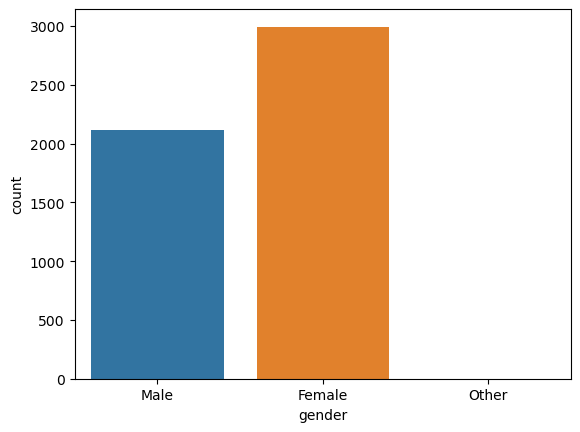

ever_married


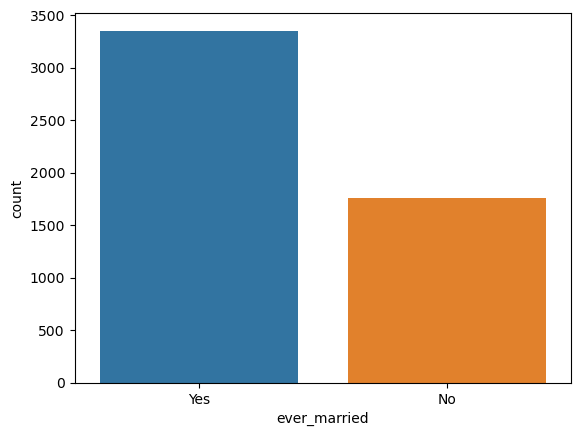

work_type


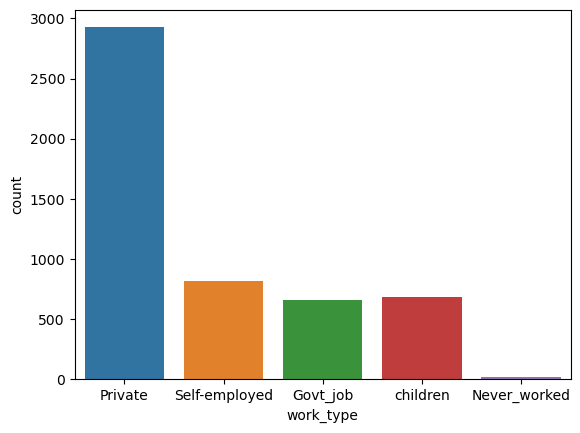

Residence_type


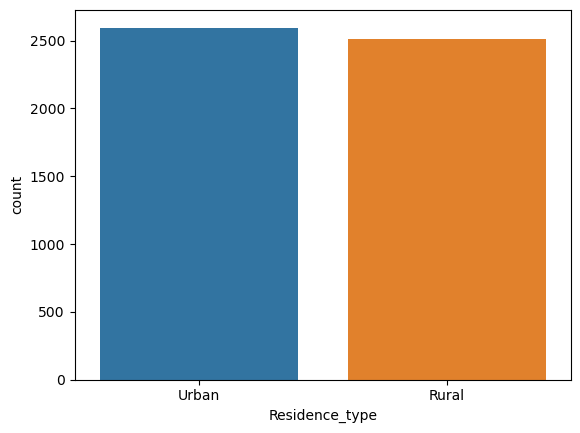

smoking_status


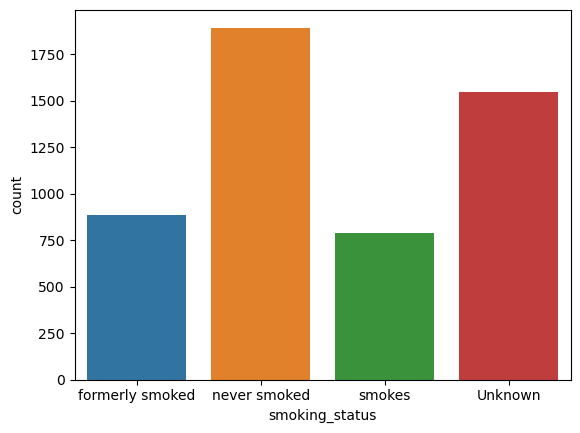

In [10]:
for col in cat_var:
    print(col)
    sns.countplot(data = heart, x = col)
    plt.show()


Comments :

- There are more female than male
- Those ones that are ever married are much compared to those who are not
- Most people's work type in the dataset is private compared to others.

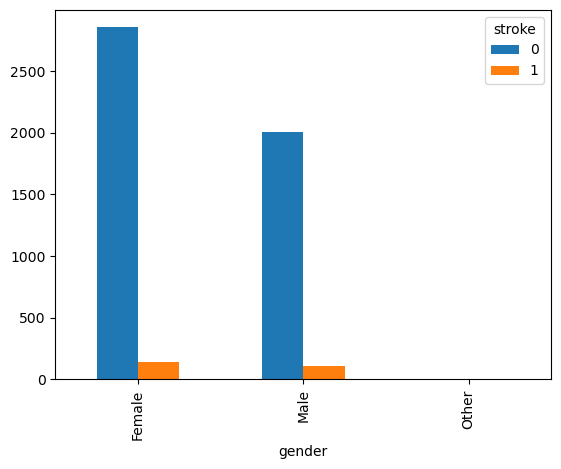

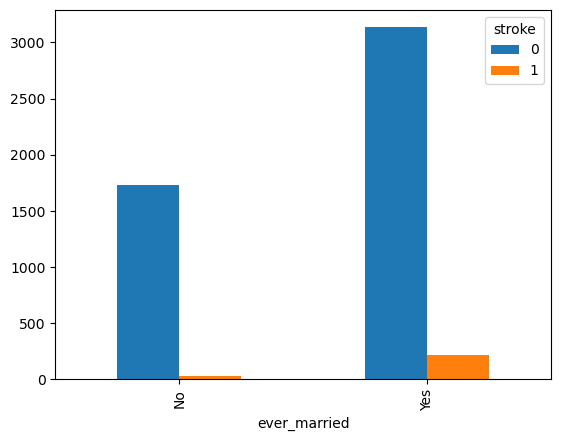

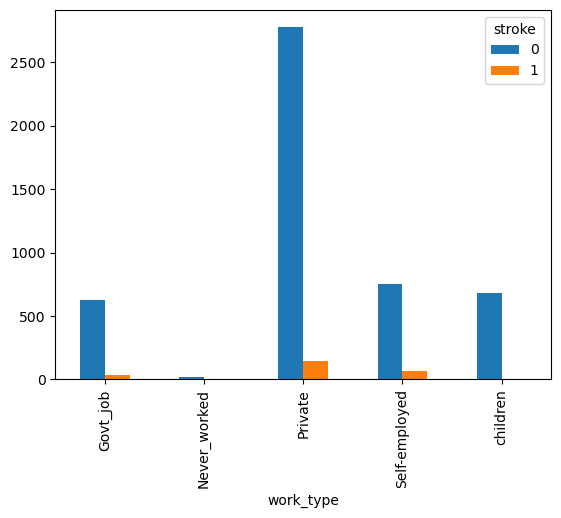

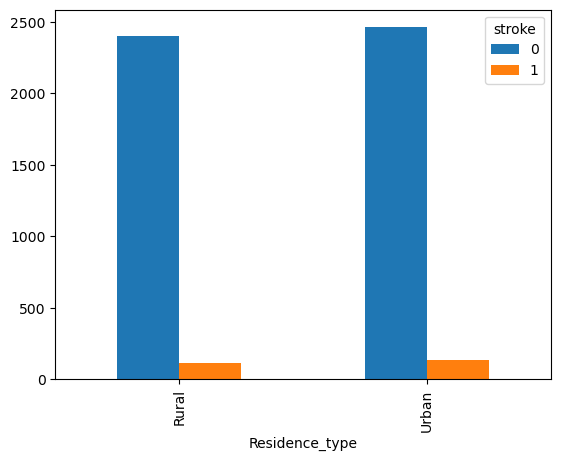

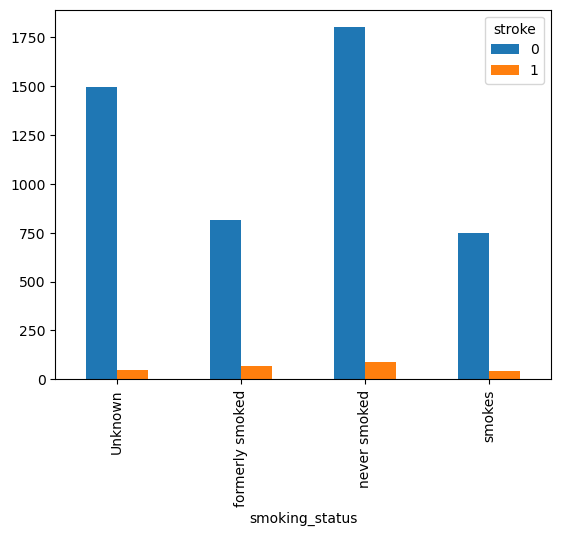

In [11]:
# Lets check how they vary with respect to the target variable


for col in cat_var:
    pd.crosstab(heart[col], heart["stroke"]).plot(kind = "bar")

# Numerical Variables

# Distribution

In [12]:
# Lets check for the numerical values
num_var = [col for col in heart.columns if heart[col].dtype == "float64"]
num_var

['age', 'avg_glucose_level', 'bmi']

age


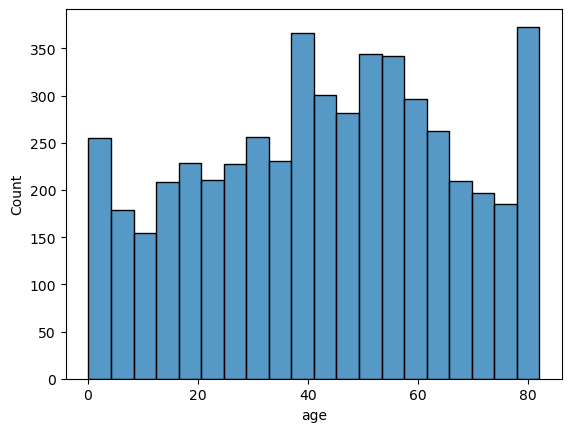

avg_glucose_level


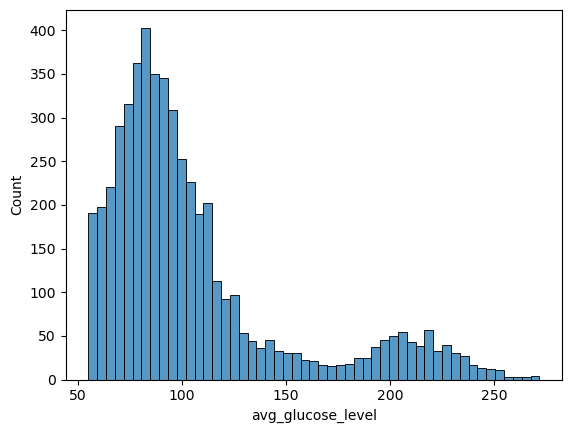

bmi


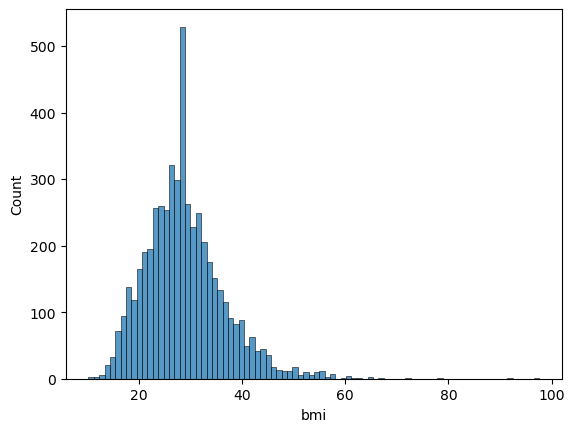

In [13]:
# Lets show the distribution and the outliers

for col in num_var:
    # Lets check for the distribution
    print(col)
    sns.histplot(data = heart, x = col)
    plt.show()

comment :
- The age is nowmally distributed (somehow)
- The avg_glucose_level is right skewed
- The bmi is normally distributed

age
_________________________
count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64


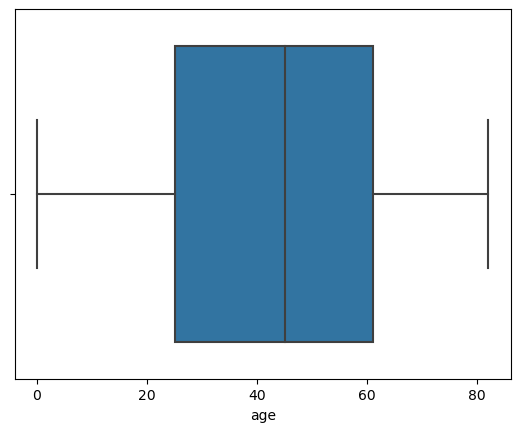

avg_glucose_level
_________________________
count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64


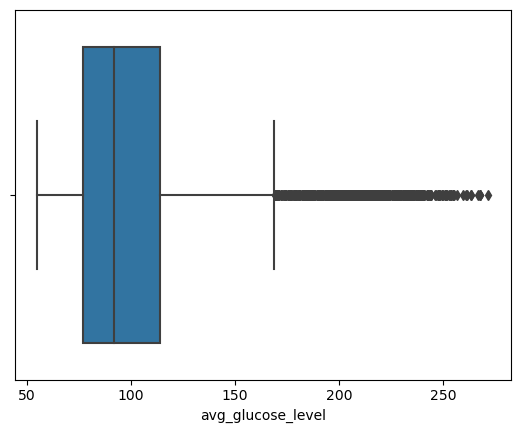

bmi
_________________________
count    5110.000000
mean       28.862035
std         7.699562
min        10.300000
25%        23.800000
50%        28.100000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64


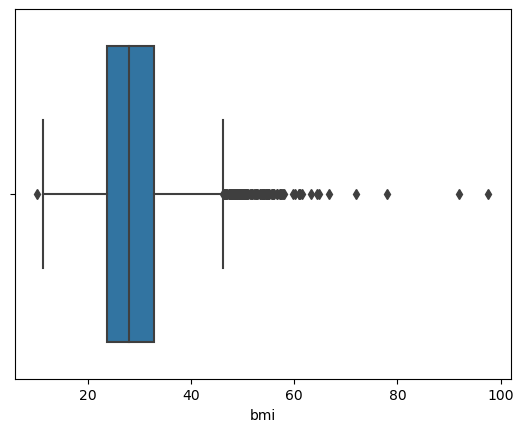

In [14]:
# Now Lets Check for outliers

for col in num_var:
    # Lets check for the distribution
    print(col)
    print("_________________________")
    print(heart[col].describe())
    sns.boxplot(data = heart, x = col)
    plt.show()

comment :
- Age doesn't have outlier
- Both the BMI and avg_glucose_level have outliers

In [15]:
heart

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Lets see which type of people are likely to have stroke.

In [43]:
stroke = heart[heart["stroke"] == 1]
stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
244,17739,Male,57.0,0,0,Yes,Private,Rural,84.96,36.7,Unknown,1
245,49669,Female,14.0,0,0,No,children,Rural,57.93,30.9,Unknown,1
246,27153,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked,1
247,34060,Male,71.0,1,0,Yes,Self-employed,Rural,87.80,28.1,Unknown,1


In [47]:
# Lets check for the residence type
stroke["stroke"].groupby(stroke['Residence_type']).count()

Residence_type
Rural    114
Urban    135
Name: stroke, dtype: int64

<Axes: xlabel='Residence_type'>

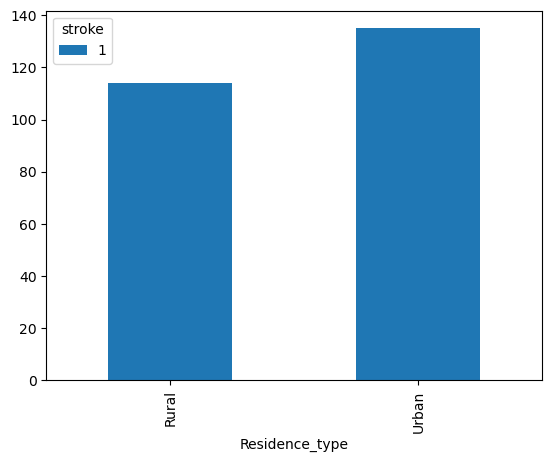

In [46]:
pd.crosstab(stroke["Residence_type"], stroke["stroke"]).plot(kind = "bar")

Comment : Those that are in Urban area are more likely to have stroke than those that are in Rural area

In [48]:
# Lets see the work_type of people that are likely to have stroke
stroke['stroke'].groupby(stroke['work_type']).count()

work_type
Govt_job          33
Private          149
Self-employed     65
children           2
Name: stroke, dtype: int64

<Axes: xlabel='work_type'>

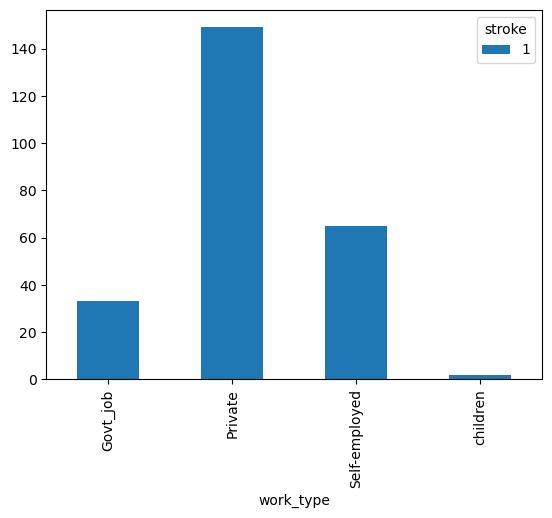

In [53]:
pd.crosstab(stroke["work_type"], stroke["stroke"]).plot(kind = "bar")

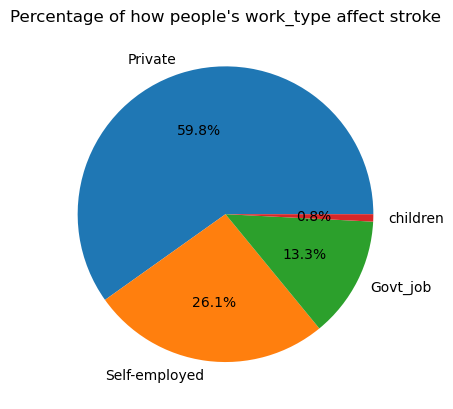

In [61]:
plt.pie(stroke["work_type"].value_counts(), labels=[col for col in stroke["work_type"].unique()], autopct= "%1.1f%%")
plt.title("Percentage of how people's work_type affect stroke")
plt.show()

Comment: 
- As we can see from the above diagram, about 59.8% of those that have stroke are working in a private organization
- while those that are self-employed are next likely to have, about 26.1% .
- About 13.3% of the people that has stroke are working in government office
- Least number of people are children

In [114]:
# stroke['stroke'].groupby(stroke['gender']).count()
# stroke['stroke'].groupby(stroke['smoking_status']).count()
# stroke['stroke'].groupby(stroke['hypertension']).count()

In [115]:
# Lets see the percentage of those people that ever married have stroke
stroke['stroke'].groupby(stroke['ever_married']).count()

ever_married
No      29
Yes    220
Name: stroke, dtype: int64

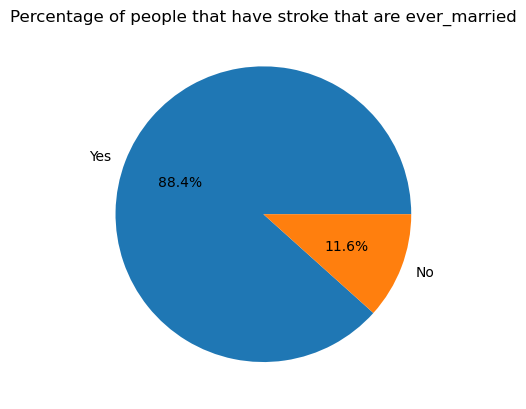

In [116]:
plt.pie(stroke["ever_married"].value_counts(), labels=[col for col in stroke["ever_married"].unique()], autopct= "%1.1f%%")
plt.title("Percentage of people that have stroke that are ever_married")
plt.show()

Comments : We can see that about 88.4% of those people that has stroke ever_married (very much), while the remaining 11.6% are not married

In [117]:
# To check the number and type of people that ever_married and have stroke
stroke.groupby('gender')["ever_married"].value_counts()

gender  ever_married
Female  Yes             120
        No               21
Male    Yes             100
        No                8
Name: ever_married, dtype: int64

In [118]:
# To show the number of male that works and smokes
stroke.groupby('gender')[["work_type","smoking_status"]].value_counts()

gender  work_type      smoking_status 
Female  Private        never smoked       33
        Self-employed  never smoked       22
        Private        formerly smoked    18
                       Unknown            13
                       smokes             12
        Self-employed  formerly smoked    10
        Govt_job       never smoked        8
                       Unknown             6
                       formerly smoked     6
        Self-employed  smokes              4
                       Unknown             4
        Govt_job       smokes              3
        children       Unknown             2
Male    Private        formerly smoked    25
                       smokes             17
                       Unknown            16
                       never smoked       15
        Self-employed  formerly smoked     9
                       never smoked        8
                       Unknown             4
                       smokes              4
        Govt_job

In [119]:
# To check the number of male or female (that ever_married and smokes) have stroke
stroke.groupby("gender")[["ever_married", "smoking_status"]].value_counts()

gender  ever_married  smoking_status 
Female  Yes           never smoked       53
                      formerly smoked    31
                      Unknown            19
                      smokes             17
        No            never smoked       10
                      Unknown             6
                      formerly smoked     3
                      smokes              2
Male    Yes           formerly smoked    36
                      never smoked       22
                      smokes             22
                      Unknown            20
        No            never smoked        5
                      Unknown             2
                      smokes              1
dtype: int64

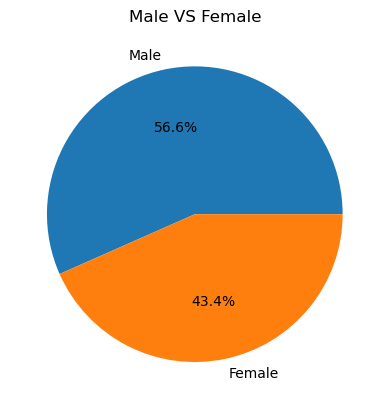

In [68]:
plt.pie(stroke["gender"].value_counts(), labels=[col for col in stroke["gender"].unique()], autopct= "%1.1f%%")
plt.title("Male VS Female")
plt.show()

Comment : More male has stroke than female (about 56.6% to 43.4%)

In [130]:
stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
244,17739,Male,57.0,0,0,Yes,Private,Rural,84.96,36.7,Unknown,1
245,49669,Female,14.0,0,0,No,children,Rural,57.93,30.9,Unknown,1
246,27153,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked,1
247,34060,Male,71.0,1,0,Yes,Self-employed,Rural,87.80,28.1,Unknown,1


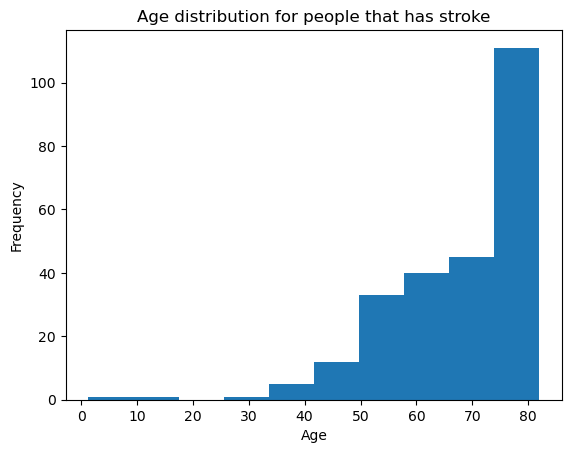

In [138]:
# Lets check for the age distribution
plt.hist(stroke["age"])
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age distribution for people that has stroke")
plt.show()

Comment: 
1. The people at age 80 are most likely to have stroke and those in age 30 are least likely.
2. As the age increases from 30 to 80, the likeliness to have stroke increases since more people having stroke increases as we move from age 30 to 80.

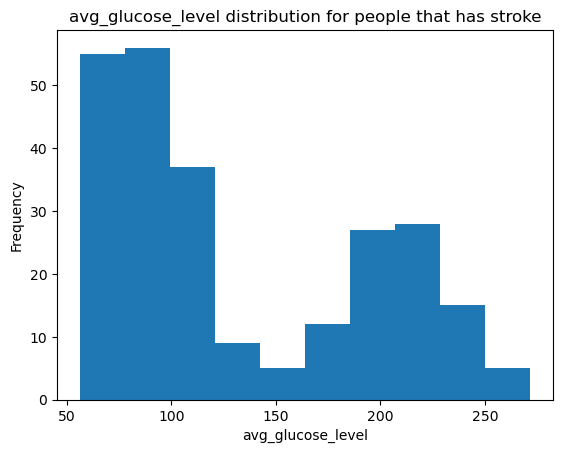

In [140]:
# Lets check how the average_glucose level can cause stroke

plt.hist(stroke["avg_glucose_level"])
plt.xlabel("avg_glucose_level")
plt.ylabel("Frequency")
plt.title("avg_glucose_level distribution for people that has stroke")
plt.show()